In [2]:
import numpy as np
from scipy.constants import hbar
import matplotlib.pyplot as plt

In [3]:
h = hbar * 2*np.pi
#C6 = h*869.7*10**3 # [Mhz*um**6]
#C6 = h*1200*10**3  # [Mhz*um**6]

In [40]:
def V(r): # r is in mircon and the energy is in Mhz
    return C6/r**6

def radius_from_Delta(Delta):
    return (C6/(h*Delta))**(1/6)

In [41]:
def dens_peak_half(N, R1, R2):
    R1=(R1)*3.125
    R2=(R2)*3.125
    AvR=(R1+R2)/(2*np.sqrt(2))*10**(-4)
    d_peak = N/((2*np.pi*AvR**2)**(3/2))
    d_half = N/((2*np.pi*np.e*AvR**2)**(3/2))
    
    return d_half, d_peak, AvR

def dens_program(N, R1, R2):
    
    d_peak = N/((np.pi**(3/2)*R1*R2*np.sqrt(R1*R2)*(3.3*10**-6)**3))*(10**-6)
    d_half = d_peak/2

    return d_half, d_peak

In [42]:
#N_atoms = 150000
#shape = [40, 40]
#mean_density, peak_density = dens_program(N_atoms, shape[0], shape[1]) # mean_density = N__interacting_atoms / int_volume


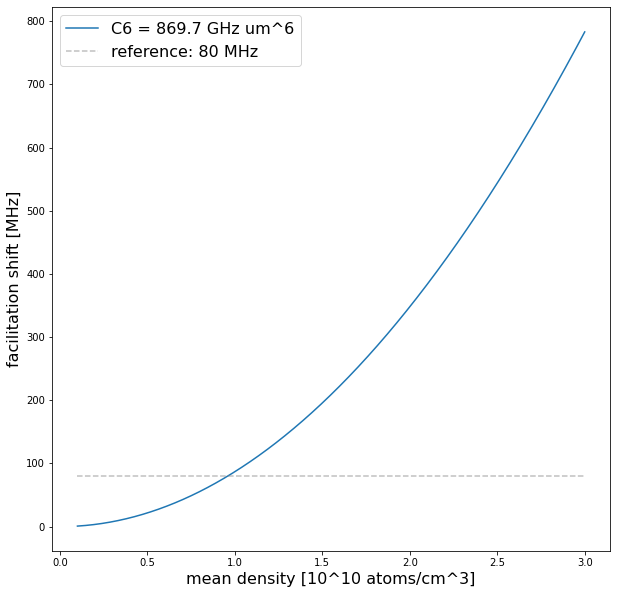

In [43]:
mean_density = 1.5 * 10**-2 # atoms/cm^3
radius_mot = 100 # um
waiste_blue = 40 # um

means = np.linspace(0.1, 3, 1000)*10**-2

C6s = [870*10**3]#, h*1200*10**3]
labels = ["C6 = 869.7 GHz um^6"]#, "C6 = 1.2 THz um^6"]
plt.figure(figsize=(10,10))
for i, C6 in enumerate(C6s):
    max_detunings = []
    interatomic_distances = []
    for mean_density in means:
        
        interatomic_distance = (1/(mean_density))**(1/3)
        max_detuning = V(interatomic_distance)
        max_detunings.append(max_detuning)
        interatomic_distances.append(interatomic_distance)

    plt.plot(means*10**2, max_detunings, label=labels[i])
    plt.ylabel("facilitation shift [MHz]", fontsize=16)
    plt.xlabel("mean density [10^10 atoms/cm^3]", fontsize=16)

plt.plot([min(means*10**2),max(means*10**2)], [80, 80], "--", color="gray", alpha=0.5, label="reference: 80 MHz")
plt.legend(fontsize=16)
plt.show()


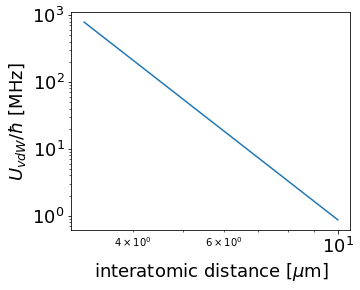

In [57]:
plt.figure(figsize=(5,4))
plt.plot(interatomic_distances, max_detunings)
#plt.plot([min(interatomic_distances),max(interatomic_distances)], [80, 80], "--", color="gray", alpha=0.5, label="reference: 80 MHz")
plt.ylabel("$U_{vdW}/\hbar$ [MHz]", fontsize=18)
plt.xlabel("interatomic distance [$\mu$m]", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale("log")

plt.show()

0.0033333333333333335

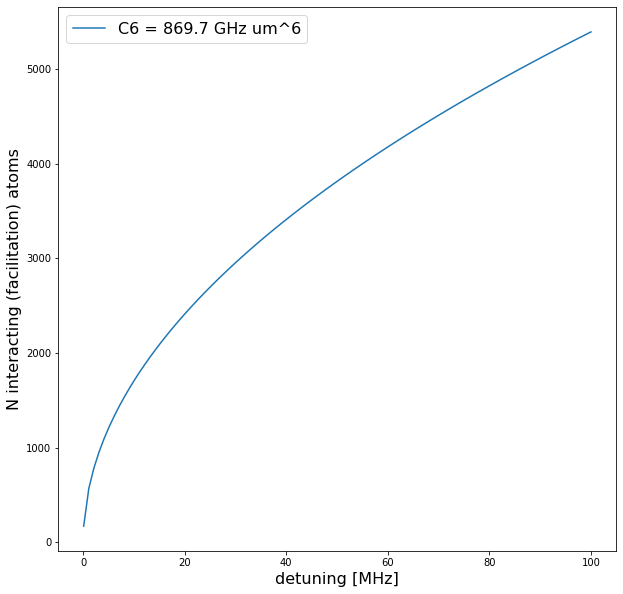

In [9]:
waiste_blue = 40
radius_mot = 50
int_volume = np.pi*waiste_blue**2 * 2*radius_mot

detunings = np.linspace(0.1, 100, 100)

plt.figure(figsize=(10,10))

for i, C6 in enumerate(C6s):
    N_interacting_atoms_s = []
    for detuning in detunings:
        interatomic_distance = radius_from_Delta(detuning)
        N_interacting_atoms = int_volume / interatomic_distance**3
        N_interacting_atoms_s.append(N_interacting_atoms)
    
    plt.plot(detunings, N_interacting_atoms_s, label=labels[i])
    plt.ylabel("N interacting (facilitation) atoms", fontsize=16)
    plt.xlabel("detuning [MHz]", fontsize=16)

plt.legend(fontsize=16)
plt.show()

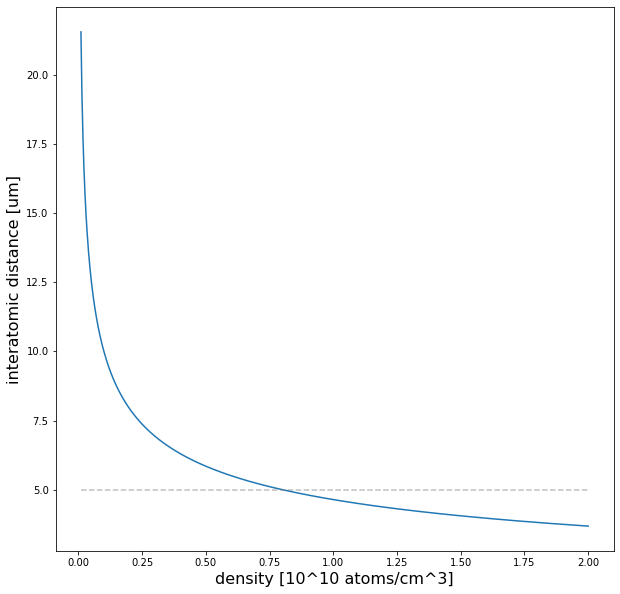

In [10]:
plt.figure(figsize=(10,10))
plt.plot(means*10**2, interatomic_distances)
plt.ylabel("interatomic distance [um]", fontsize=16)
plt.xlabel("density [10^10 atoms/cm^3]", fontsize=16)
plt.plot([min(means*10**2),max(means*10**2)], [5, 5], "--", color="gray", alpha=0.5, label="reference: 5 um")
plt.show()

In [11]:
waiste_blue = 40
radius_mot = 50
int_volume = np.pi*waiste_blue**2 * 2*radius_mot

interatomic_distance = 6

N_interacting_atoms = int_volume / interatomic_distance**3
N_interacting_atoms

2327.105669325773

# facilitation

$$
p(\text{"1 atom in the volume dxdydz"}) = \frac{dxdydz}{V}
$$

$V$ is the interaction volume

$$
p(\text{"1 atom in the facilitation shell [r, r+dr] of another one in dxdydz"}) = \frac{dxdydz}{V} * (\frac{4}{3} \pi (r-(r-dr))^3)
$$

In [12]:
Prob

NameError: name 'Prob' is not defined